
<a href="https://githubtocolab.com/Astolfo2332/white_paper_LoRa/blob/main/math_exercises.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


<div style="display: flex; align-items: center;">
    <div>
        <h2>Ejercicios evaluables</h2>
        <h2>Miguel López</h2>
        <h2>ID 1001014378</h2>
    </div>
    <img src="https://yt3.ggpht.com/-10IUL9wra6k/AAAAAAAAAAI/AAAAAAAAAAA/UOBLu1uYOOE/s900-c-k-no/photo.jpg" alt="Image description" width="200" style="margin-left: 20px;"/>
</div>

## Solución

### 1. a Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.

In [3]:
import  numpy as np
from win32comext.mapi.mapiutil import prTable


def determinante_recursivo(matriz):
    #evaluar si la matriz es cuadrada
    if matriz.shape[0] != matriz.shape[1]:
        raise valueerror("la matriz no es cuadrada")
    if matriz.shape[0] == 1:
        return matriz[0,0]
    det = 0
    for i in range(matriz.shape[0]):
        #tomamos los valores de la primera fila y los delimitamos con la columna i
        #eliminando la primera fila y la columna i
        det += (-1)**i * matriz[0,i] * determinante_recursivo(np.delete(np.delete(matriz, 0, 0), i, 1))
    return det

test = [np.array([[1,2,3],[4,5,6],[7,8,9]]),
        np.array([[1,2,3],[4,5,6],[7,8,10]]),
        np.array([[1,2],[3,4]])]

for i in test:
    print(i)
    print("Determinante:", determinante_recursivo(i))


[[1 2 3]
 [4 5 6]
 [7 8 9]]
Determinante: 0
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
Determinante: -3
[[1 2]
 [3 4]]
Determinante: -2


### 1. b
Si A es una matriz cuadrada $n×n$ y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.

### Respuesta

 Nos ayudaremos del código anterior, pero en sí se da debido a que la multiplicación con sus pares superiores o inferiores van a ser 0, por ende solo quedaría multiplicar los elementos de la diagonal principal. Notes claro que si uno de estos elementos es 0 el determinante será 0. Pero se puede demostrar de la siguiente forma en un caso general de matriz triangular inferior:

$$
\begin{vmatrix}
a & b & c \\
0 & d & e \\
0 & 0 & f \\
\end{vmatrix}
= a \cdot
\begin{vmatrix}
d & e \\
0 & f \\
\end{vmatrix}
- b \cdot
\begin{vmatrix}
0 & e \\
0 & f \\
\end{vmatrix}
+ c \cdot
\begin{vmatrix}
0 & d \\
0 & 0 \\
\end{vmatrix}
$$

$$
= a \cdot (d \cdot f) - b \cdot 0 + c \cdot 0
$$

$$
= a \cdot d \cdot f
$$

Para una triangular superior funciona de la misma forma.

$$
\begin{vmatrix}
a & 0 & 0 \\
b & d & 0 \\
c & e & f \\
\end{vmatrix}
= a \cdot
\begin{vmatrix}
d & 0 \\
e & f \\
\end{vmatrix}
- 0 \cdot
\begin{vmatrix}
b & 0 \\
c & f \\
\end{vmatrix}
+ 0 \cdot
\begin{vmatrix}
b & d \\
c & e \\
\end{vmatrix}
$$

$$
= a \cdot (d \cdot f) -  0 +  0
$$

$$
= a \cdot d \cdot f
$$





In [8]:
# Usando la función determinante_recursivo

test = [np.array([[1,0,0],[2,3,0],[4,5,6]]),
        np.array([[1,2,3],[0,4,5],[0,0,6]]),
        np.array([[1,0,0],[2,3,0],[4,5,6]]),]

for i in test:
    print(i)
    print("Determinante:", determinante_recursivo(i))
    #np.prod multiplica los elementos de un array y np.diag obtiene la diagonal de una matriz
    print("Determinante multiplicando diagonal:", np.prod(np.diag(i)))

[[1 0 0]
 [2 3 0]
 [4 5 6]]
Determinante: 18
Determinante multiplicando diagonal: 18
[[1 2 3]
 [0 4 5]
 [0 0 6]]
Determinante: 24
Determinante multiplicando diagonal: 24
[[1 0 0]
 [2 3 0]
 [4 5 6]]
Determinante: 18
Determinante multiplicando diagonal: 18


### 1. c
Determínese de forma justificada cómo alteran el determinante de una
matriz $n × n$ las dos operaciones elementales siguientes:

- Intercambiar una fila (o columna) por otra fila (o columna).
- Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

### Respuesta

En el caso de intercamabiar una fila por otra, el determinante cambia de signo, esto se puede demostrar de la siguiente forma, supongamos una matrix $A$ y otra $A'$ que es la matriz $A$ con las filas $i$ y $j$ intercambiadas, entonces:
$$
A =
\begin{vmatrix}
a & b \\
c & d \\
\end{vmatrix}
= a \cdot d - b \cdot c
$$

Al realizar el cambio de fila:

$$
A' =
\begin{vmatrix}
c & d \\
a & b \\
\end{vmatrix}
= c \cdot b - d \cdot a
$$

Así si igualamos las dos expresiones anteriores:

$$
a \cdot d - b \cdot c = -(d \cdot a - c \cdot b)
$$

Por consiguiente se puede concluir que el determinante es:

$$
det(A) = -det(A')
$$


In [11]:
test = [np.array([[1,2],[3,4]]),
        np.array([[4,5],[6,7]])]

for i in test:
    print(i)
    print("Determinante:", determinante_recursivo(i))
    #Intercambiamos las filas
    print(i[::-1])
    print("Determinante con filas intercambiadas:", determinante_recursivo(i[::-1]))

[[1 2]
 [3 4]]
Determinante: -2
[[3 4]
 [1 2]]
Determinante con filas intercambiadas: 2
[[4 5]
 [6 7]]
Determinante: -2
[[6 7]
 [4 5]]
Determinante con filas intercambiadas: 2


En el caso de sumar a una fila otra fila multiplicada por un escalar $\alpha$, el determinante no se ve afectado, esto se puede demostrar de la siguiente forma, supongamos una matrix $A$ y otra $A'$ que es la matriz $A$ con la fila $i$ multiplicada por un escalar $\alpha$ y sumada a la fila $j$, entonces:
$$
A =
\begin{vmatrix}
a & b \\
c & d \\
\end{vmatrix}
= a \cdot d - b \cdot c
$$

Aplicando la transformación:

$$
A' =
\begin{vmatrix}
a & b \\
c + \alpha a & d + \alpha b \\
\end{vmatrix}
= a \cdot (d + \alpha b) - b \cdot (c + \alpha a)
= a \cdot d + a \cdot \alpha b - b \cdot c - b \cdot \alpha a
= a \cdot d - b \cdot c
$$

Por ende el determinante no se ve afectado.


In [13]:
test = [np.array([[1,2],[3,4]]),
        np.array([[4,5],[6,7]])]

for i in test:
    print(i)
    print("Determinante:", determinante_recursivo(i))
    #Multiplicamos la primera fila por 2 y la sumamos a la segunda
    i[1] = i[1] + 2*i[0]
    print(i)
    print("Determinante con filas sumadas:", determinante_recursivo(i))

[[1 2]
 [3 4]]
Determinante: -2
[[1 2]
 [5 8]]
Determinante con filas sumadas: -2
[[4 5]
 [6 7]]
Determinante: -2
[[ 4  5]
 [14 17]]
Determinante con filas sumadas: -2


### 1. d
Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.
### 1.e

¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes? Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.

### Respuesta
Sabemos que el intercambio de filas puede cambiar el signo del determinante, así que se llevara un valor de escala para tener en cuenta en el calculo del determinante, de resto el proceso general es:
- Identificar le mayor valor en las filas de la matriz que no sean 0 de la posición $(0, n)$ de esta matriz.
- Intercambiar la fila con el mayor valor con la fila actual.
- Realizar una multiplicación por un escalar que vuelva 0 las filas por debajo del pivote.
- Repetir el proceso para las filas restantes.

In [4]:
#Creamos una función que nos permita hacer un pivote parcial
def gauss_pivoteo_parcial(matrix, col=0):
    #Matriz aumentada
    #Convertimos la matriz en float para evitar problemas con las divisiones
    max_row_index = np.argmax(np.abs(matrix[col:, col])) + col
    #Se inicia la constante de cambio de filas para corregir el determinate
    swap_constant = 1
    # Intercambiar filas si es necesario
    if max_row_index != col:
        swap_constant = -1
        matrix[[col, max_row_index]] = matrix[[max_row_index, col]]
    return matrix, swap_constant

def eliminacion_gauss(matrix):

    matrix = matrix.astype(float)
    m, n = matrix.shape

    swap_factor = 1
    for col in range(min(m, n)):
        # Realizar pivoteo parcial en la columna actual
        matrix, swap_constant = gauss_pivoteo_parcial(matrix, col)
        #Lo multiplicamos por el factor de cambio de filas
        swap_factor *= swap_constant

        #Convertimos a 0 los elementos por encima del pivote
        for row in range(col + 1, m):
            factor = matrix[row, col] / matrix[col, col]
            matrix[row, col:] -= factor * matrix[col, col:]

    return matrix, swap_factor

def determinante_gauss(matrix):
    matrix_es, swap_factor = eliminacion_gauss(matrix)
    #Corregimos el determinante
    return np.prod(np.diag(matrix_es )) * swap_factor

test = [np.array([[0,2,3],[4,5,6],[7,8,9]]),
        np.array([[1,2,3],[4,5,6],[7,8,10]]),
        np.array([[1,2],[3,4]])]

for i in test:
    matrix_es, swap_factor = eliminacion_gauss(i)
    print(i)
    print(matrix_es)
    print("Determinante de la matriz original", determinante_recursivo(i))
    #Corregimos el determinante
    print("Determinante por multiplicación de diagonal", determinante_gauss(i))


[[0 2 3]
 [4 5 6]
 [7 8 9]]
[[7.         8.         9.        ]
 [0.         2.         3.        ]
 [0.         0.         0.21428571]]
Determinante de la matriz original 3
Determinante por multiplicación de diagonal 3.0000000000000018
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
[[ 7.00000000e+00  8.00000000e+00  1.00000000e+01]
 [ 0.00000000e+00  8.57142857e-01  1.57142857e+00]
 [ 0.00000000e+00  5.55111512e-17 -5.00000000e-01]]
Determinante de la matriz original -3
Determinante por multiplicación de diagonal -2.9999999999999982
[[1 2]
 [3 4]]
[[3.         4.        ]
 [0.         0.66666667]]
Determinante de la matriz original -2
Determinante por multiplicación de diagonal -2.0


Cabe resaltar que los resultados en decimales son debido a la approximation de los números flotantes, pero en realidad el determinante es el número más cercano a un ente

### 1.f
Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.

### Respuesta

**Definición recursiva**: La complejidad de la definición recursiva es de $O(n^2 \cdot  n!)$, esto se debe a que en cada llamada recursiva se eliminan $n$ columnas y $n$ filas, por ende se realizan $n!$ llamadas recursivas. Y de estas columnas resta calcular el determinante de las submatrices lo que se hace en un $n^2$ por cada diagonal, por ende su complejidad final es la multiplication de ambos procesos.

**Eliminación con pivote**: En este caso la complejidad se da por el número de operaciones que se realizan en la matriz, en este caso se realizan $n^2$ operaciones por cada fila, y se realizan $n$ filas, por ende la complejidad es de $O(n^3)$ para reducir la matriz luego la multiplicación del determinante se considera $O(1)$, así su multiplicación lo deja como $O(n^3)$.



In [7]:
#Usando la libreria big_o para obtener la complejidad solo del método de gauss ya que el método recursivo es muy lento
import big_o
matrix_gen = lambda n: np.random.randint(0, 10, (n, n))

best, others = big_o.big_o(determinante_gauss, matrix_gen, n_repeats=10, max_n=2000)

print(best)

Quadratic: time = -1 + 1.4E-05*n^2 (sec)


En este caso da como resultado un algoritmo de complejidad $O(n^2)$, lo cual se puede interpretar como una falta de valores o intentos de la librería para obtener una complejidad más precisa, pero en general se puede decir que la complejidad es de $O(n^3)$.

### 1.g

Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ Rn×n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
- Utilizando determinante recursivo.
- Empleando determinante gauss.
- Haciendo uso de la función preprogramada numpy.linalg.det.

In [52]:
# al caso anterior se generan matrices aleatorias y se calcula el tiempo de ejecución

import timeit

sizes = list(range(2, 11))

times = {"Recursivo": [], "Gauss": [], "Numpy": []}

for n in sizes:
    matrix = np.random.randint(0, 10, (n, n))
    times["Recursivo"].append(timeit.timeit(lambda: determinante_recursivo(matrix), number=1))
    times["Gauss"].append(timeit.timeit(lambda: determinante_gauss(matrix), number=1))
    times["Numpy"].append(timeit.timeit(lambda: np.linalg.det(matrix), number=1))

import pandas as pd

df = pd.DataFrame(times, index=sizes)
df["diff_rec_gauss"] = df["Recursivo"] - df["Gauss"]
df["diff_rec_numpy"] = df["Recursivo"] - df["Numpy"]
df["diff_gauss_numpy"] = df["Gauss"] - df["Numpy"]

df

,Recursivo,Gauss,Numpy,diff_rec_gauss,diff_rec_numpy,diff_gauss_numpy
2,0.000073,0.000101,0.000121,-0.000028,-0.000048,-0.000020
3,0.000232,0.000088,0.000030,0.000144,0.000201,0.000057
4,0.000481,0.000126,0.000337,0.000355,0.000144,-0.000211
5,0.001704,0.000085,0.000020,0.001619,0.001684,0.000065
6,0.008491,0.000127,0.000029,0.008364,0.008463,0.000098
7,0.058220,0.000159,0.000030,0.058061,0.058190,0.000129
8,0.473510,0.000192,0.000034,0.473318,0.473476,0.000158
9,4.284957,0.000200,0.000031,4.284757,4.284926,0.000169
10,42.833801,0.000230,0.000031,42.833571,42.833770,0.000199


Cabe resaltar que la implementación de Numpy usa el método de descomposición LU para calcular el determinante, por ende es más eficiente que el método de eliminación de Gauss, pero en general el método de eliminación de Gauss es más eficiente que el método recursivo. Como se puede observar en la tabla anterior,sobre todo para matrices de tamaño grande.

### 2.a

Prográmese en Python el método de descenso de gradiente para funciones de
n variables. La función deberá tener como parámetros de entradas:

- El gradiente de la función que se desea minimizar ∇f (puede venir dada como otra
función previamente implementada, grad f, con entrada un vector, representando
el punto donde se quiere calcular el gradiente, y salida otro vector, representando
el gradiente de f en dicho punto).
- Un valor inicial x0 ∈ Rn (almacenado en un vector de n componentes).
El ratio de aprendizaje γ (que se asume constante para cada iteración).
- Un parámetro de tolerancia tol (con el que finalizar el proceso cuando ∥∇f(x)∥2 <
tol).
- Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas
en caso de divergencia o convergencia muy lenta).
- La salida de la función deberá ser la aproximación del x que cumple f′(x) ≈ 0, correspondiente
a la última iteración realizada en el método.

### Respuesta
Recordemos que la ecuación de descenso de gradiente es la siguiente:

$$
x_{k+1} = x_k - \gamma \cdot \nabla f(x_k)
$$

Donde:
- $x_k$ es el punto actual
- $\gamma$ es el ratio de aprendizaje
- $\nabla f(x_k)$ es el gradiente de la función en el punto actual
- $x_{k+1}$ es el punto siguiente

Para que el código no se vuelva infinito se establece un número máximo de iteraciones y una tolerancia para el gradiente, si este es menor a la tolerancia se detiene el proceso.

In [129]:
def gradient_descent(grad_f, x0, gamma, tol, maxit):
    #Se asigna el valor inicial
    x = x0
    trajectory = [x]
    #Ireramos sobre el rango
    for i in range(int(maxit)):
        #Se obtiene el gradiente
        try:
            grad = grad_f(x)
        #En caso de error se detiene el proceso, ya que se llegó a un valor
        #muy grande de gradiente
        except Exception as e:
            print(e)
            break
        #Se evalúa si el gradiente es menor a la tolerancia mediante la norma del vector
        if np.linalg.norm(grad) < tol:
            break
        #Se actualiza el valor de x
        x = x - gamma * grad
        trajectory.append(x)
    return x, trajectory

### 2.b
Sea la función $f : R → R$ dada por
$$
f(x) = 3x^4 + 4x^3 − 12x^2 + 7.
$$

Sabemos que su gradiente es:

$$
\nabla f(x) = \frac{\partial}{\partial x} (3x^4 + 4x^3 − 12x^2 + 7)
$$

$$
\nabla f(x) = 12x^3 + 12x^2 − 24x.
$$


### I
Aplica el método sobre f(x) con x0 = 3 γ = 0.001, tol=1e-12,
maxit=1e5.

In [114]:
#Aplicamos el gradiente
def grad_f(x):
    return 12*x**3 + 12*x**2 - 24*x

def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 + 7

x0 = 3
gamma = 0.001
tol = 1e-12
maxit = 1e5

x, trajectory_1 = gradient_descent(grad_f, x0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en f(x)", f(x))

Posible minimo 1.0000000000000275
Valor en f(x) 2.0


### II

Aplica de nuevo el método sobre f(x) con x0 = 3, γ = 0.01,
tol=1e-12, maxit=1e5.

In [115]:
x0 = 3
gamma = 0.01
tol = 1e-12
maxit = 1e5

x, trajectory_2 = gradient_descent(grad_f, x0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en f(x)", f(x))

Posible minimo -1.9999999999999882
Valor en f(x) -24.999999999999996


### III
Contrasta e interpreta los dos resultados obtenidos en los apartados
anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué
influencia puede llegar a tener la elección del ratio de aprendizaje γ?

### Respuesta

Inicialmente, observemos como se comporta la función $f(x)$.

Donde si derivamos la función obtenemos el gradiente de la función, y si igualamos a 0 obtenemos los puntos críticos de la función.

$$
f'(x) = 12x^3 + 12x^2 − 24x = 0
$$

$$
12x(x^2 + x - 2) = 0
$$

$$
12x(x + 2)(x - 1) = 0
$$

$$
x = 0, -2, 1
$$

Además podemos evaluar los puntos críticos de la función, para determinar si son máximos o mínimos locales, reemplazando su valor en la segunda derivada de la forma.

$$
f''(x) = 36x^2 + 24x - 24
$$

$$
f''(0) = -24
$$
$$
f''(-2) = 72
$$
$$
f''(1) = 36
$$


Por los valores podemos decir que $x = 0$ es un máximo local, $x = -2, 1$ son mínimos locales.

Así si reemplazamos los valores en la función obtenemos que los mínimos locales son:

$$
f(0) = 7
$$
$$
f(-2) = -25
$$
$$
f(1) = 2
$$

Siendo así el mínimo global $x = -2$, minimo local $x = 1$ y máximo local $x = 0$.



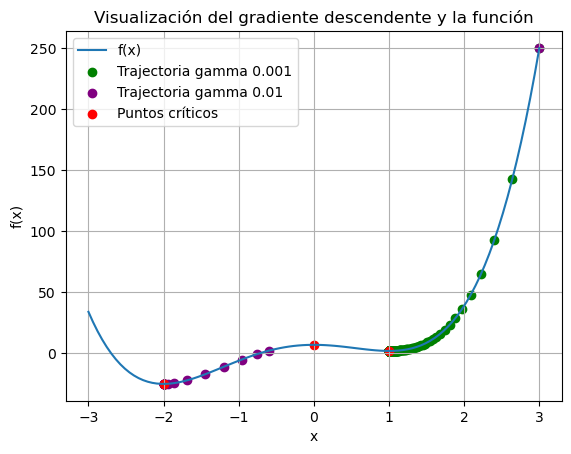

In [133]:
import matplotlib.pyplot as plt
import sympy as sp

#Realizamos una comprobación de los calculos
#Establecemos la función
x2 = sp.symbols('x')
f2 = 3*x2**4 + 4*x2**3 - 12*x2**2 + 7

def graph_analysis(f, f2, trajectory_1, trajectory_2=False, labels=["Trajectoria gamma 0.001", "Trajectoria gamma 0.01"]):

    #La derivamos
    grad_f2 = sp.diff(f2, x2)

    #Se obtienen los puntos críticos
    puntos_criticos = sp.solve(grad_f2, x2)


    x = np.linspace(-3, 3, 100)

    plt.plot(x, f(x), label="f(x)")
    plt.scatter(trajectory_1, f(np.array(trajectory_1)), color="green", label=labels[0])
    if trajectory_2:
        plt.scatter(trajectory_2, f(np.array(trajectory_2)), color="purple", label=labels[1])
    plt.scatter(puntos_criticos, f(np.array(puntos_criticos)), color="red", label="Puntos críticos")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Visualización del gradiente descendente y la función")
    plt.legend()
    plt.grid()
    plt.show()

graph_analysis(f, f2, trajectory_1, trajectory_2)

Ahora comparando los ratios de aprendizaje, podemos observar que su "salto" entre cada valor influye en la elección de valores de mínimos locales finales, en el caso de un $\gamma = 0.001$ al su valor ser pequeño su trayectoria es más lenta y se queda en un mínimo local, en el caso de $\gamma = 0.01$ su trayectoria es más rápida y se queda en un mínimo local diferente inferior al de $\gamma = 0.001$. Esto se puede observar en la magnitud de ambas trayectorias de la forma:



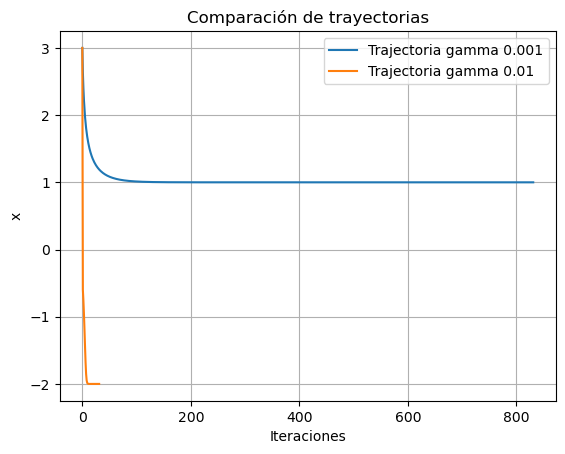

In [138]:
def trajectory_analysis(trajectory_1, trajectory_2=False, labels=["Trajectoria gamma 0.001", "Trajectoria gamma 0.01"]):
    plt.plot(trajectory_1, label=labels[0])
    if trajectory_2:
        plt.plot(trajectory_2, label=labels[1])
    plt.xlabel("Iteraciones")
    plt.ylabel("x")
    plt.title("Comparación de trayectorias")
    plt.legend()
    plt.grid()
    plt.show()

trajectory_analysis(trajectory_1, trajectory_2)

Donde $\gamma = 0.01$ converge más rápidamente al encontrar un mínimo local, pero en general la elección de $\gamma$ es un proceso de prueba y error para encontrar el mejor valor de convergencia. Y en este caso en particular la mejor elección es un $\gamma = 0.01$ para encontrar un mínimo local. Ya que tiene menos iteraciones y converge en un mínimo local más bajo que el de $\gamma = 0.001$.

También cabe resaltar que $\gamma = 0.001$ no cambia su valor pese a que exista un minimo local más bajo, esto se debe a que el valor de $\gamma$ es muy pequeño y no puede saltar a un mínimo local más bajo.

### IV
Aplica nuevamente el método sobre f(x) con x0 = 3, γ = 0.1,
tol=1e-12, maxit=1e5. Interpreta el resultado.

### V

Finalmente, aplica el método sobre f(x) con x0 = 0, γ = 0.001,
tol=1e-12, maxit=1e5. Interpreta el resultado y compáralo con el estudio analítico
de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [141]:
x0 = 3
gamma = 0.1

x, trajectory_3 = gradient_descent(grad_f, x0, gamma, tol, maxit)
print("Posible minimo", x)
try:
    print("Valor en f(x)", f(x))
except Exception as e:
    print(e)


x_0 = 0
gamma = 0.001

x, trajectory_4 = gradient_descent(grad_f, x_0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en f(x)", f(x))

(34, 'Result too large')
Posible minimo -5.951710057987933e+125
(34, 'Result too large')
Posible minimo 0
Valor en f(x) 7


En estos casos con el valor de $\gamma = 0.1$ y $x_0 = 3$ se puede observar que el valor de $x$ diverge, esto se debe a que el valor de $\gamma$ es muy grande y no puede converger en un mínimo local, por ende se aleja del mínimo local, además de imposibilitar su cálculo y tener que recurrir a un early stop debido a la magnitud de su valor.

Por otra parte, en el caso de $x_0 = 0$ y $\gamma = 0.001$ se puede observar que el valor de $x$ converge al valor semilla, esto debido a que el cálculo de su gradiente en $\nabla f(0) = 0$, por ende su norma es inferior al valor de tolerancia y se detiene el proceso, esto se puede observar en la trayectoria de la forma:

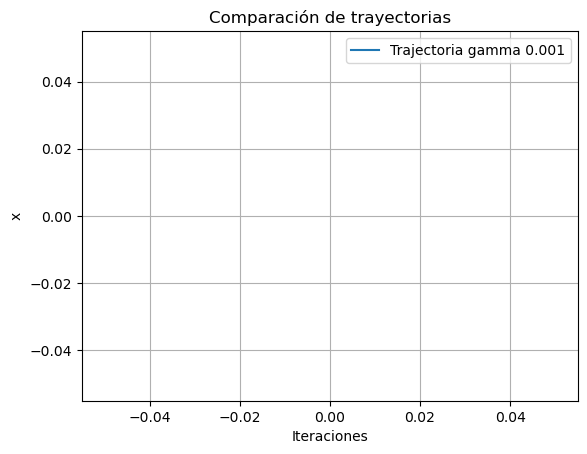

In [140]:
trajectory_analysis(trajectory_4, labels=["Trajectoria gamma 0.001"])

Adicional a esto podemos conocer el valor donde que tenía x antes de tener un overflow.

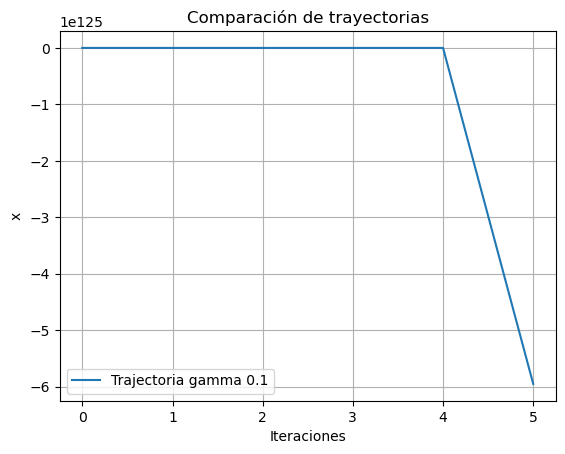

Trayectoria de gamma=0.01 [3, -33.0, 41705.4, -87049951065956.78, 7.915654682433035e+41, -5.951710057987933e+125]


In [149]:
trajectory_analysis(trajectory_3, labels=["Trajectoria gamma 0.1"])

print("Trayectoria de gamma=0.01",trajectory_3)

Tomando así una trayectoria donde pasa los mínimos locales, siendo su primer paso -33, así nunca converge a un mínimo local, por ende se detiene el proceso debido a la magnitud de su valor.

Así con estos dos casos indeseables, uno donde el valor es tan grande que no se puede calcular y por ende no converge, y otro donde el valor del gradiente resultante es 0 y por ende frenara su proceso de búsqueda prematuramente, de manera similar si se toma como valor inicial 1 o -2. Por eso es esencial hacer pruebas tanto de varios valores semillas como de varios valores de $\gamma$ para encontrar el mejor valor de convergencia y evitar estos casos indeseables, pero antes de elegir valores de manera aleatoria es mejor tener un gráfico o una noción de la función a minimizar para evitar estos casos indeseables.

Para solucionar el problema en ambos casos se puede, en el caso de $\gamma = 0.1$ se puede disminuir el valor de $\gamma$ para evitar que el valor diverja, lo cual es el literal 2.b.II con un $\gamma = 0.01$, y en el caso de $x_0 = 0$ se puede cambiar el valor de $x_0$ para evitar que el valor de $x$ sea 0 (máximo local), a uno $x \approx 0$ y se detenga el proceso prematuramente.

Posible minimo -1.9999999999999873
Valor en f(x) -24.999999999999996


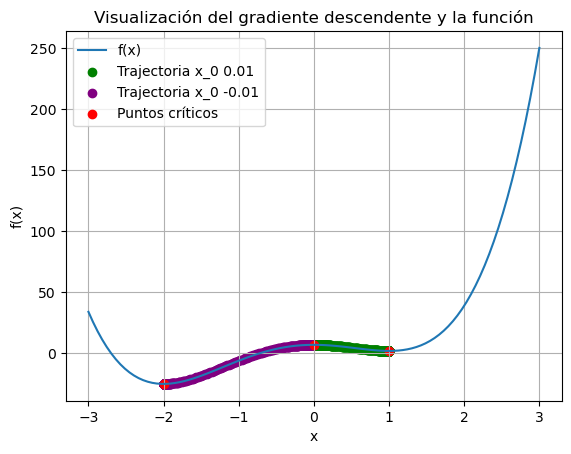

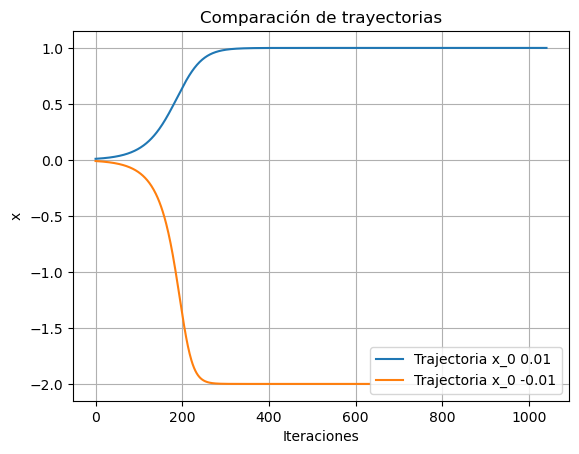

In [161]:
x_0 = - 0.01
gamma = 0.001

x, trajectory_4 = gradient_descent(grad_f, x_0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en f(x)", f(x))

x_0 = 0.01

x, trajectory_3 = gradient_descent(grad_f, x_0, gamma, tol, maxit)

graph_analysis(f, f2, trajectory_3, trajectory_4, labels=["Trajectoria x_0 0.01", "Trajectoria x_0 -0.01"])

trajectory_analysis(trajectory_3 , trajectory_4, labels=["Trajectoria x_0 0.01", "Trajectoria x_0 -0.01"])

Algo interesante en este caso es que debido al valor bajo de $\gamma$ dependiendo del valor de $x_0$ puede converger en uno de los mínimos locales, en este caso converge en el mínimo local de $x = -2$ y $x = 1$,siendo el mejor de los casos con este $\gamma$ usar $x_0 = -0.01$. También cabe resaltar que su proceso de convergencia es más lento que los casos anteriores, necesitando cerca de 250 iteraciones para converger en el mínimo local.

### 2.c

Sea la función $g : R2 → R$ dada por
$$
g(x, y) = x^2 + y^3 + 3xy + 1.
$$

### Respuesta

Para obtener el gradiente de la función $g(x, y)$ se debe derivar con respecto a $x$ y $y$.

$$
\frac{\partial}{\partial x} (x^2 + y^3 + 3xy + 1) = 2x + 3y
$$

$$
\frac{\partial}{\partial y} (x^2 + y^3 + 3xy + 1) = 3y^2 + 3x
$$

$$
\nabla g(x, y) = \begin{bmatrix} 2x + 3y \\ 3y^2 + 3x \end{bmatrix}
$$




### I
Aplíquese el método sobre g(x, y) con x0 = (−1, 1), γ = 0.01,
tol=1e-12, maxit=1e5.

In [206]:
def g(x,y):
    return x**2 + y**3 + 3*x*y + 1

def grad_g(x):
    x, y = x
    return np.array([2*x + 3*y, 3*y + 3*x])

x0 = np.array([-1, 1])
gamma = 0.01
tol = 1e-12
maxit = 1e5

x, trajectory_5 = gradient_descent(grad_g, x0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en g(x)", g(*x))


Posible minimo [-3.28327764e+234  2.78135343e+234]
Valor en g(x) nan


C:\Users\migue\AppData\Local\Temp\ipykernel_15948\1592206462.py:2: RuntimeWarning: overflow encountered in scalar power
  return x**2 + y**3 + 3*x*y + 1
C:\Users\migue\AppData\Local\Temp\ipykernel_15948\1592206462.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return x**2 + y**3 + 3*x*y + 1
C:\Users\migue\AppData\Local\Temp\ipykernel_15948\1592206462.py:2: RuntimeWarning: invalid value encountered in scalar add
  return x**2 + y**3 + 3*x*y + 1


De manera similar a lo observado anteriormente el valor no converge en un mínimo local posiblemente a la elección del valor semilla. Si observamos la trayectoria de la forma:

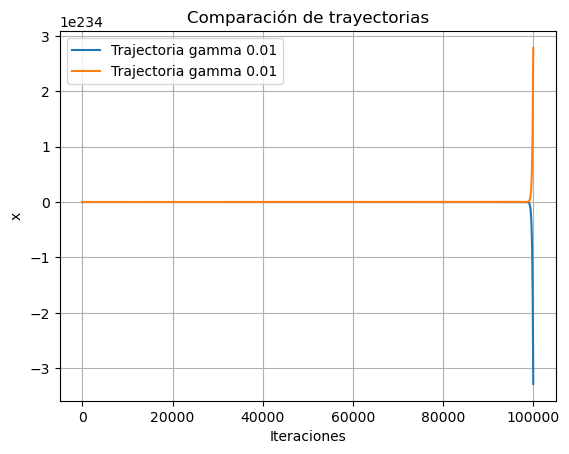

In [166]:
trajectory_analysis(trajectory_5, labels=["Trajectoria gamma 0.01"])

En este caso como podemos observar ambos valores crecen de manera exponencial, esto se debe a que el valor de $\gamma$ es muy grande y no puede converger en un mínimo local, por ende se aleja del mínimo local, además de imposibilitar su cálculo y tener que recurrir a un early stop debido a la magnitud de su valor.

### II
¿Qué ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultado
deseable?

In [185]:
x0 = np.array([0, 0])

x, trajectory_6 = gradient_descent(grad_g, x0, gamma, tol, maxit)
print("Posible minimo", x)
print("Valor en g(x)", g(*x))

Posible minimo [0 0]
Valor en g(x) 1


Ahora en este caso tenemos algo similar al resultado del literal 2.b.V, donde el valor de $x$ converge en un mínimo local, pero en este caso converge en el "mínimo local" de $x = 0$ y $y = 0$, esto se debe a que el valor de $x, y = 0 , 0$ y por ende si reemplazamos en la matriz de gradiente tendremos $\nabla g(0, 0) = (0, 0)$, asi que el proceso se detiene prematuramente, esto se puede observar en la trayectoria con solo una iteración.

In [186]:
print(" Trayectoria de x,y = 0, 0",trajectory_6)

Trayectoria de x,y = 0, 0 [array([0, 0])]


### III

Realícese el estudio analítico de la función y utilícese para explicar y
contrastar los resultados obtenidos en los dos apartados anteriores.

### Respuesta

Para la función $g(x, y)$ sabemos cual es su gradiente, por ende si queremos conocer sus mínimos locales debemos igualar a 0 su gradiente.

$$
2x + 3y = 0 (1)
$$

$$
3y^2 + 3x = 0 (2)
$$

De la primera ecuación podemos despejar $x$ en función de $y$:

$$
x = -\frac{3}{2}y
$$

Reemplazando en la segunda ecuación:

$$
3y^2 + 3(-\frac{3}{2}y) = 0
$$

$$
3y^2 - \frac{9}{2}y = 0
$$

$$
y(3y - \frac{9}{2}) = 0
$$

$$
y = 0, \frac{3}{2}
$$

Sustituyendo en la ecuación (1):

$$
x = 0, -\frac{9}{4}
$$


Por ende los mínimos locales son:

$$
(0, 0), (-\frac{9}{4}, \frac{3}{2})
$$

Evaluando el Hessiano de la función tenemos:

$$
H = \begin{bmatrix} \frac{\partial^2 g}{\partial x^2} & \frac{\partial^2 g}{\partial x \partial y} \\ \frac{\partial^2 g}{\partial y \partial x} & \frac{\partial^2 g}{\partial y^2} \end{bmatrix}
$$

$$
H = \begin{bmatrix} 2 & 3 \\ 3 & 6y \end{bmatrix}
$$

Donde el determinante de la matriz es:

$$
det(H) = 2 \cdot 6y - 3 \cdot 3 = 12y - 9
$$

Reemplazando los valores de $y$: $y = 0, \frac{3}{2}$

$$
det(H) = 0, 9
$$

Por ende el valor $(0, 0)$ no se puede inferir nada, y el valor $(-\frac{9}{4}, \frac{3}{2})$ al ser $\frac{\partial^2 g}{\partial x^2} > 0$  es un mínimo local.

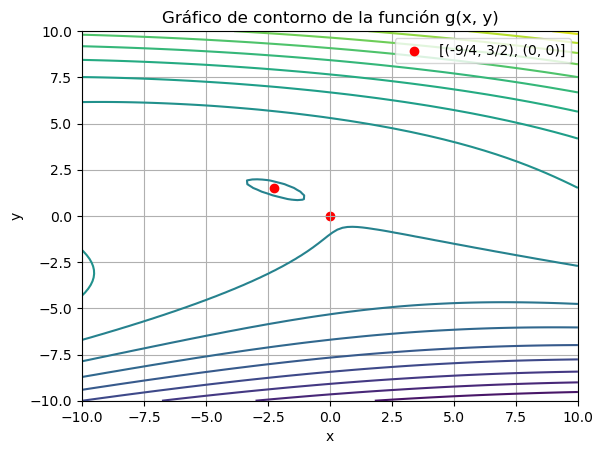

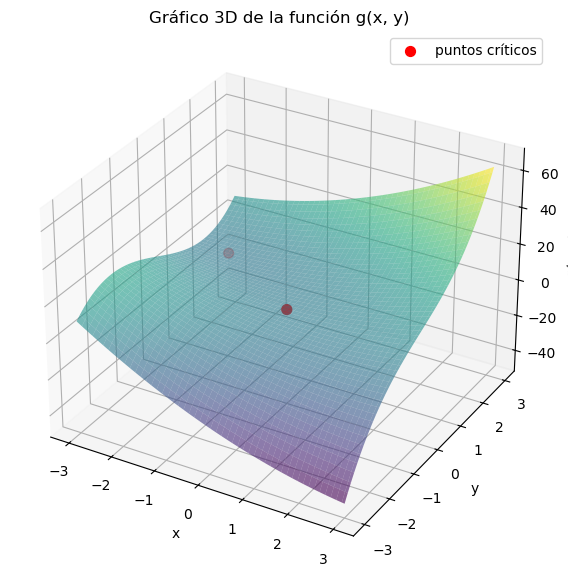

In [317]:
#Para analizar la función se puede realizar un gráfico de contorno

x2 = sp.symbols('x')
y2 = sp.symbols('y')
g2 = x2**2 + y2**3 + 3*x2*y2 + 1

#Se obtiene el gradiente
grad_g2 = [sp.diff(g2, x2), sp.diff(g2, y2)]

#Se obtienen los puntos críticos
puntos_criticos = sp.solve(grad_g2, (x2, y2))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

Z = g(X, Y)

graf_puntos_x, graf_puntos_y = zip(*puntos_criticos)
plt.contour(X, Y, Z, levels=20)
plt.scatter(graf_puntos_x, graf_puntos_y, color="red", label=puntos_criticos)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de contorno de la función g(x, y)")
plt.legend()
plt.grid()
plt.show()

#Ahora un grafico 3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)

Z = g(X, Y)
puntos_criticos_z = [g(*i) for i in puntos_criticos]
ax.scatter(graf_puntos_x, graf_puntos_y, puntos_criticos_z, color="red", label="puntos críticos", s=50)
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("g(x, y)")
ax.legend()
plt.title("Gráfico 3D de la función g(x, y)")
plt.show()



En este caso ¿cómo podemos encontrar el minimo local? Sabemos que es diferente a $0, 0$ pero si usamos ese valor como semilla no convergirá debido a que vuelve 0 el gradiente. Y con el $\gamma$ actual no converge al mínimo relativo de $(-\frac{9}{4}, \frac{3}{2})$ debido al tamaño de sus pasos, por ende debemos cambiar el valor de $\gamma$ para encontrar el mínimo local.

In [304]:
x0 = np.array([-1, 1])
gamma_list = [1e-6]
maxit = 1e6

for gamma in gamma_list:
    x, trajectory = gradient_descent(grad_g, x0, gamma, tol, maxit)
    print("Posible minimo", x)
    print("Valor en g(x)", g(*x))


Posible minimo [-1.84764252  1.56578745]
Valor en g(x) -0.4264375618837981


In [252]:
print("Minimo local", float(g(puntos_criticos[0][0], puntos_criticos[0][1])))

Minimo local -0.6875


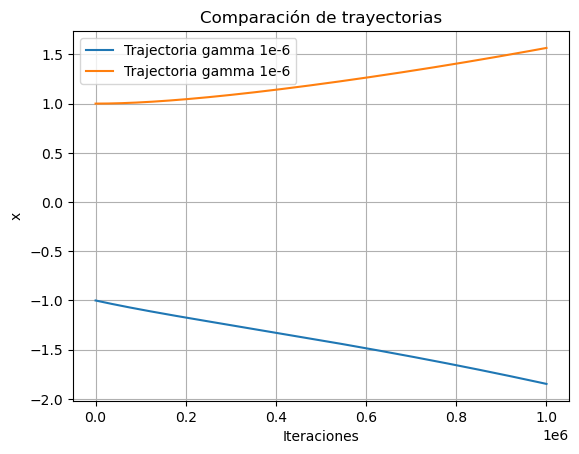

In [305]:
trajectory_analysis(trajectory, labels=["Trajectoria gamma 1e-6"])

Siendo el mejor valor de $\gamma = 1e-6$ para encontrar el mínimo local de $(-\frac{9}{4}, \frac{3}{2})$, donde se puede observar que su trayectoria es más lenta que los casos anteriores, necesitando cerca de 1e6 iteraciones para casi intentar converger al mínimo local.